In [1]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import random

In [2]:
data = pk.load(open('./gps_log_data.pk', 'rb'))

In [3]:
K = 10
T = 96
D = 14

In [4]:
for uid in data:
    for i in range(len(data[uid])):
        k = np.random.randint(K)
        data[uid][i].append(k)

In [44]:
loc_clusters = dict({})
ntk = np.zeros([T, K])
ndk = np.zeros([D, K])
nuk = dict({})
nk = np.zeros(K)

In [45]:
for uid in data:
    loc_clusters[uid] = [None for k in range(K)]
    points = [[] for k in range(K)]
    for i in range(len(data[uid])):
        points[data[uid][i][-1]].append(data[uid][i][2: 4])
    for k in range(K):
        points[k] = np.array(points[k])
        if len(points[k]) == 0:
            mu = np.array([35.0, 139.0])
            cov = np.array([[9.0, 0.0], [0.0, 9.0]])
        elif len(points[k]) == 1:
            mu = points[k][0]
            cov = np.array([[1e-2, 0.0], [0.0, 1e-2]])
        else:
            mu = np.mean(points[k], axis=0)
            cov = (np.cov(points[k], rowvar=0) + np.identity(2) * 1e-4)
        loc_clusters[uid][k] = multivariate_normal(mean=mu, cov=cov)

In [46]:
for uid in data:
    nuk[uid] = np.zeros(K)
    for i in range(len(data[uid])):
        d = data[uid][i][0]
        t = data[uid][i][1]
        k = data[uid][i][-1]
        ntk[t, k] += 1
        ndk[d, k] += 1
        nuk[uid][k] += 1
        nk[k] += 1

In [47]:
user_list = list(data.keys())

for it in range(10):
    print('Iteration {}'.format(it))
    uid_cnt = 0
    data_size = len(user_list)
    
    random.shuffle(user_list)
    for uid in user_list:
        random.shuffle(data[uid])
    
    for uid in user_list:
        
        uid_cnt += 1
        
        for i in range(len(data[uid])):
            d = data[uid][i][0]
            t = data[uid][i][1]
            l = np.array(data[uid][i][2:4])
            k = data[uid][i][4]
            
            ntk[t, k] -= 1
            ndk[d, k] -= 1
            nuk[uid][k] -= 1
            nk[k] -= 1
            
            p = np.array([loc_clusters[uid][j].pdf(l) for j in range(K)]) * (((ntk[t, :] + 0.1) / (nk + T * 0.1)) ** 1.5) * (((ndk[d, :] + 0.1) / (nk + D * 0.1)) ** 1.5) * (nuk[uid] + 0.1)
            p /= np.sum(p)
            k = np.random.choice(range(K), p=p)
            data[uid][i][4] = k
            
            ntk[t, k] += 1
            ndk[d, k] += 1
            nuk[uid][k] += 1
            nk[k] += 1
        
        points = [[] for k in range(K)]
        for i in range(len(data[uid])):
            points[data[uid][i][-1]].append(data[uid][i][2: 4])
        for k in range(K):
            points[k] = np.array(points[k])
            if len(points[k]) == 0:
                mu = np.array([35.0, 139.0])
                cov = np.array([[9.0, 0.0], [0.0, 9.0]])
            elif len(points[k]) == 1:
                mu = points[k][0]
                cov = np.array([[1e-2, 0.0], [0.0, 1e-2]])
            else:
                mu = np.mean(points[k], axis=0)
                cov = (np.cov(points[k], rowvar=0) + np.identity(2) * 1e-4)
            loc_clusters[uid][k] = multivariate_normal(mean=mu, cov=cov)
        
        print('{:.1f}%'.format(uid_cnt / data_size * 100), end='\r')

Iteration 0
Iteration 1
Iteration 2
Iteration 3


KeyboardInterrupt: 

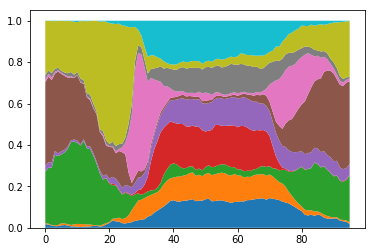

In [48]:
ntk_perc = ntk.T / np.sum(ntk, axis=1)
plt.stackplot(range(T), ntk_perc)

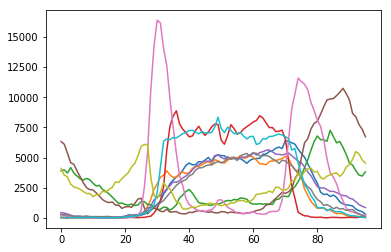

In [49]:
plt.plot(ntk)

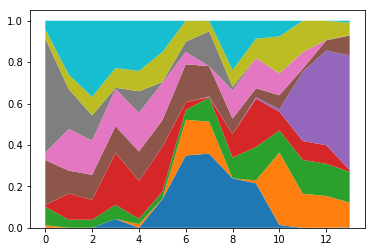

In [50]:
ndk_perc = ndk.T / np.sum(ndk, axis=1)
plt.stackplot(range(D), ndk_perc)

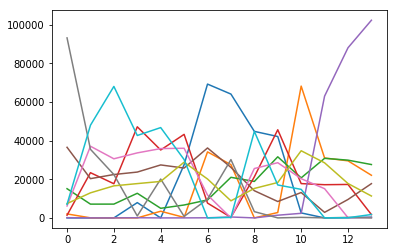

In [51]:
plt.plot(ndk)

In [ ]:
plt.plot(ndk)